In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rcParams, rc

plt.style.use('../../Paul_style.txt')
plt.rcParams["font.family"] = "Serif"

# temp colormap
cm_name = 'turku'
cm_name = 'cork'
cm_file = np.loadtxt(f'../../ScientificColourMaps7/{cm_name}/{cm_name}.txt')
cm_file = np.flip(cm_file, axis=0)
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[120:])

In [8]:
def get_wind_speeds(file):
    df = pd.read_csv(file,
                     delim_whitespace=True, skiprows=0,
                     names=('lat', 'lon', 'level',
                            'alt', 'pres', 'temp', 
                            'u', 'v', 'w',
                            'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1'))

    df = df[["lat", "level", "pres", "u"]]
    df = df.groupby(['lat', 'level']).mean().reset_index()
    df = df[["lat", "pres","u"]]

    u_data = df.u.values.reshape(48, NTAU)
    
    return u_data

<Figure size 3600x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

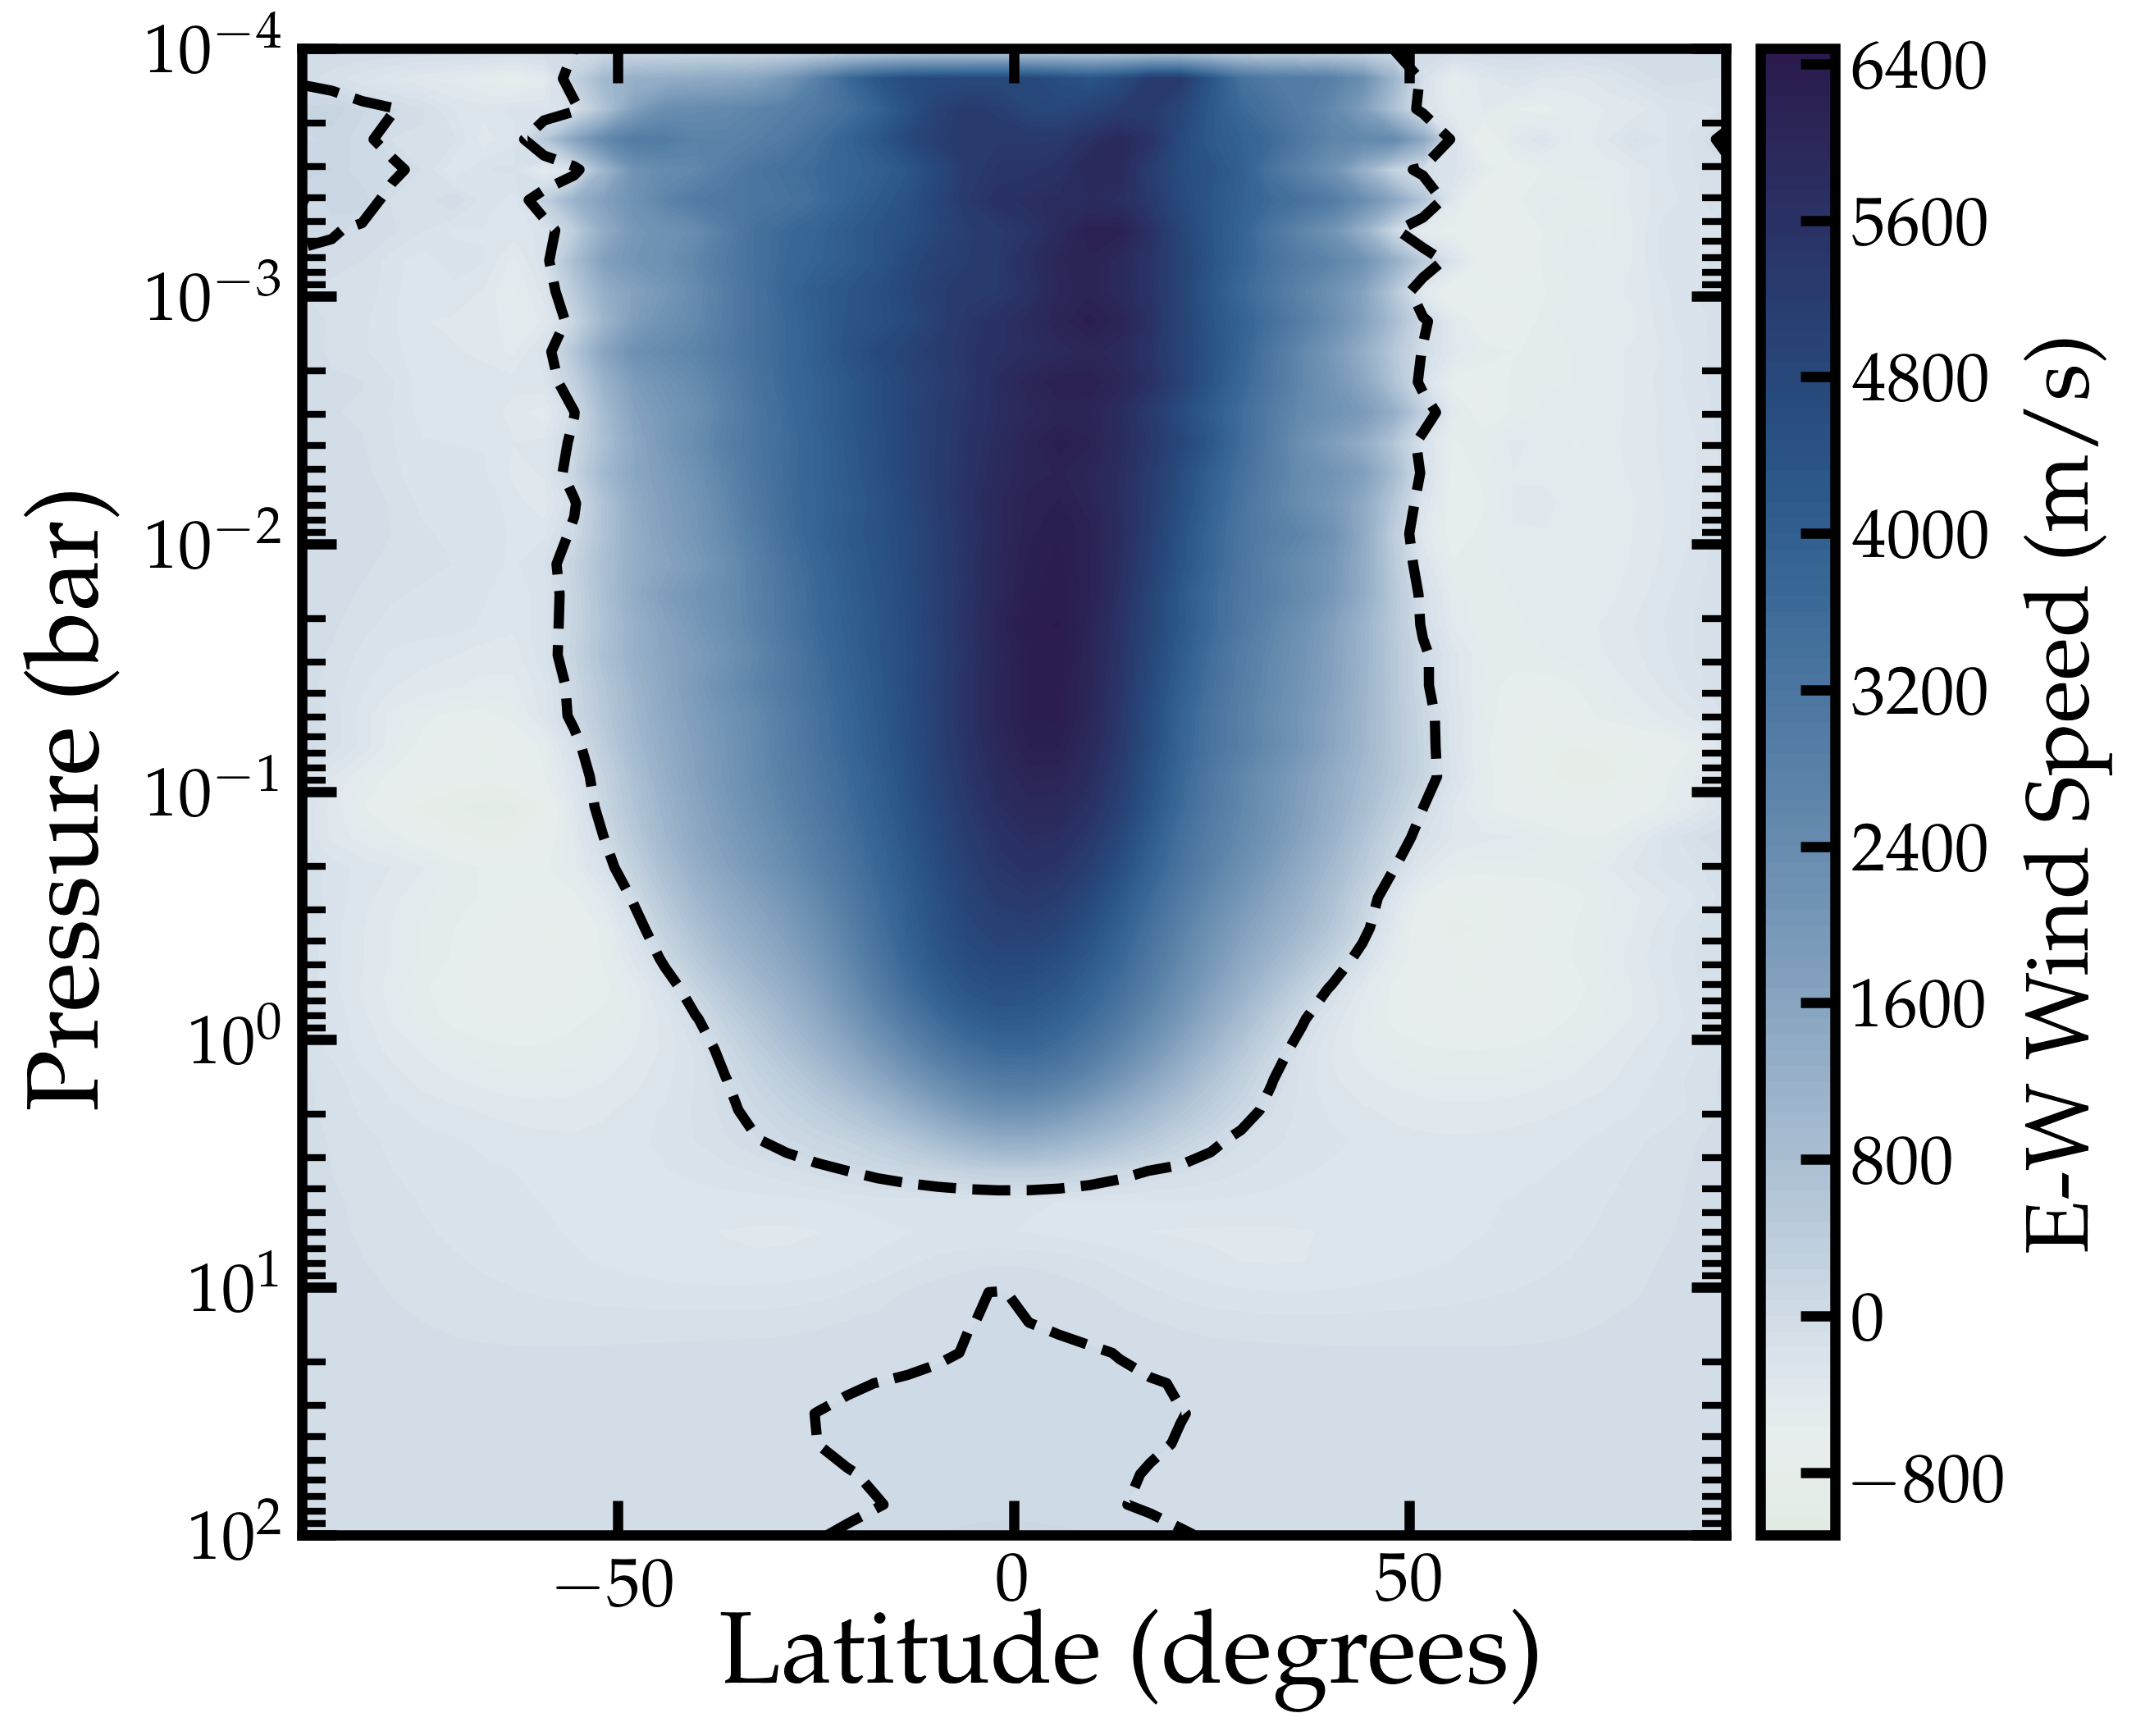

In [9]:
planet_names = [#'HD189-DOGRAY',
                #'HD189-DOGRAY-ALL-CLOUDS',
                #'HD189-DOGRAY-ALL-CLOUDS-COMPACT',
               # 'HD189-DOGRAY-NUC-CLOUDS',
                #'HD189-DOGRAY-NUC-CLOUDS-COMPACT',
              #  'HD189-PICKET',
                #'HD189-PICKET-ALL-CLOUDS',
                #'HD189-PICKET-ALL-CLOUDS-COMPACT',
             #   'HD189-PICKET-NUC-CLOUDS',
                #'HD189-PICKET-NUC-CLOUDS-COMPACT',
                'HD209-DOGRAY',
                #'HD209-DOGRAY-ALL-CLOUDS',
                #'HD209-DOGRAY-ALL-CLOUDS-COMPACT',
                'HD209-DOGRAY-NUC-CLOUDS',
                #'HD209-DOGRAY-NUC-CLOUDS-COMPACT',
                'HD209-PICKET',
               # 'HD209-PICKET-ALL-CLOUDS',
               # 'HD209-PICKET-ALL-CLOUDS-COMPACT',
                'HD209-PICKET-NUC-CLOUDS']
               # 'HD209-PICKET-NUC-CLOUDS-COMPACT']
NTAU = 50

for planet_name in planet_names:
    plt.clf()
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,8), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.02, hspace=0.1)

    lats = np.linspace(-90, 90, 48)
    pressures = np.logspace(-4, 2, NTAU)

    u_data_1 = get_wind_speeds('../Spectral-Processing/GCM-OUTPUT/' + planet_name + '.txt')
    u_data_2 = get_wind_speeds('../Spectral-Processing/GCM-OUTPUT/' + planet_name + '.txt')

    mp1 = axes.contourf(lats, pressures, u_data_1.T,  cmap=my_colors, levels=100)
    cb1 = axes.contour(lats, pressures, u_data_1.T, levels=[0], colors='black', linewidths=3, linestyles='dashed')

    #mp2 = axes[1].contourf(lats, pressures, u_data_2.T,  cmap=my_colors, levels=100)
    #cb2 = axes[1].contour(lats, pressures, u_data_2.T, levels=[0], colors='black', linewidths=3, linestyles='dashed')

    axes.set_yscale("log")
    axes.set_ylim(1e2, 1e-4)


    #temp_cbar = fig.colorbar(mp, ax=axes.ravel().tolist(), location='top', aspect=50, pad=0.02)
    temp_cbar = fig.colorbar(mp1, aspect=20, pad=0.02)

    temp_cbar.set_label('E-W Wind Speed (m/s)', size=26)

    fig.text(0.5, 0.05, r"Latitude (degrees)", size=30,  ha='center')
    fig.text(0.0, 0.5, r"Pressure (bar)", size=30,  va='center', rotation='vertical')

    plt.savefig('../Figures/wind_maps_{}.png'.format(planet_name), bbox_inches='tight', dpi=100)
